# Hello!

Welcome to the Open Point Kinetics project!

This project has been designed as an educational aid for those attempting to understand the crazy, daunting looking world of reactor physics. We hope that it might clarify some confusions that you have, and maybe even allow you to model your own systems, should you feel so inclined.

## Usage Guide

It doesn't take a lot to alter this critical system, and see what affect those alterations have on the state of the neutron population and its precursors:

* import the PointKineticsSolver module, and create a variable which is an instance of the PointKineticsSolver class that lives in that module:

In [7]:
import sys
sys.path.insert(0, '../')

from PointKineticsSolver import PointKineticsSolver


core1 = PointKineticsSolver()

Using Forward-Euler method


* set the initial neutron population

In [9]:
core1.set_power(1E8)

* now we're going to let the system run for 60 seconds in order to 'settle', *i.e.* allow the neutron population to reach an equilibrium. We supply this information via t_stop, which concerns itself with the end point of our settling time, and log_freq, which tells the object to record information about the system every 0.1 seconds - we need this for **plotting purposes**.

In [11]:
core1.solve(t_change=60, log_freq=0.1)

* next, we're going to mess this thing up. First we're going to add some reactivity, and let things settle for another 60 seconds, and then we're going to take it away again, plus a little more (again, for 60 seconds). After that, we're going to take it back to where we started, and let it get settled again.
    * **NB** we're making reactivity additions in terms of a fraction of an equilibrium $k$ value, *i.e.* $k = 1.0000$

In [12]:
# Positive reactivity step, run for further 60 seconds
core1.set_rho(1E-3)
core1.solve(t_change=60, log_freq=0.1)

# Negative reactivity step, run for further 60 seconds
core1.set_rho(-1E-3)
core1.solve(t_change=60, log_freq=0.1)

# Back to zero reactivity (critical), run for further 60 seconds
core1.set_rho(0.0)
core1.solve(t_change=60, log_freq=0.1)

* finally, we can have a look at what this did to our system in terms of its neutron population, and we can break that down into its separate bits. First, let's look at the reactivity changes, so we can confirm they look as expected.

In [18]:
# just gotta make the graphs pop

%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)

Populating the interactive namespace from numpy and matplotlib


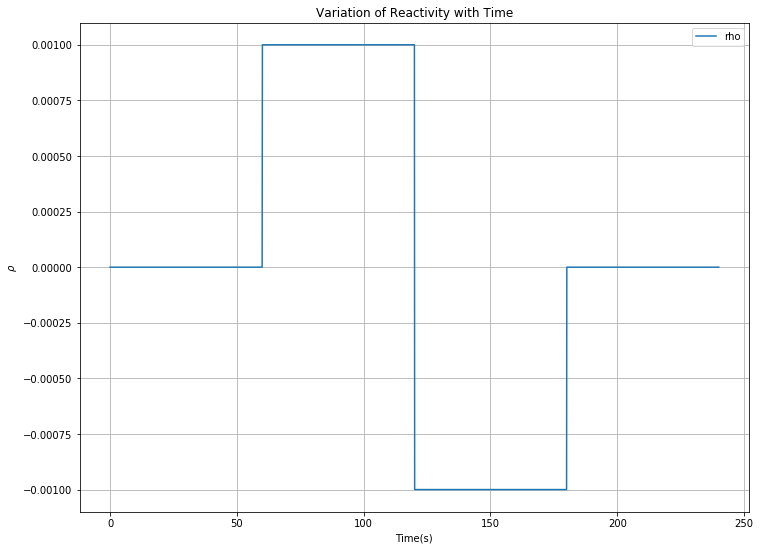

In [19]:
core1.plot_rho()

if this was a plot of we'd see that as a displacement from $1.0000$, but, as we're talking about $\rho$, it's from $0.000$. I'm sure you know already, but just to remind you, $k$ is

\begin{equation*}
    k = \frac{\text{number of neutrons in current generation}}{\text{number of neutrons in the previous generation}}
\end{equation*}

and $\rho$ is

\begin{equation*}
    \rho = \frac{k_{1} - k_{2}}{k_{1}k_{2}}
\end{equation*}

where $k_{1}$ is the current $k$ value, and $k_{2}$ is the previous value. However, for our purposes, the $k_{2} = 1$, and the equation becomes

\begin{equation*}
    \rho = \frac{k_{1} - 1}{k_{1}}
\end{equation*}

Anyway, that's enough of a detour. Let's look at the neutron population

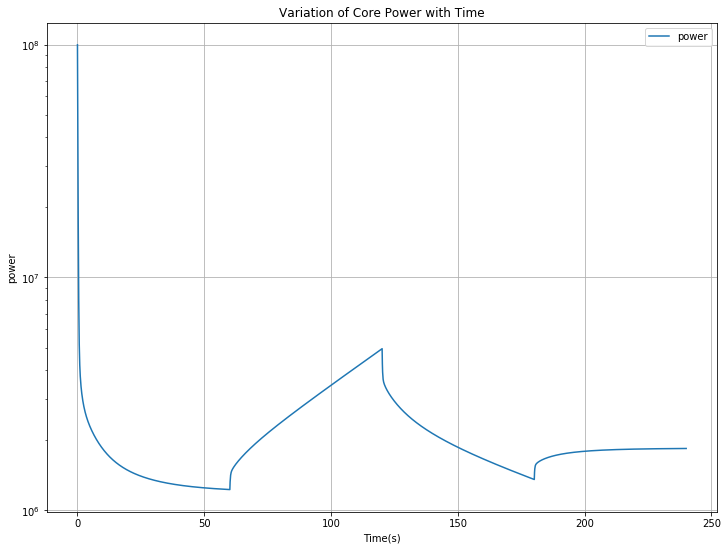

In [20]:
core1.plot_power()

This shows nicely how the neutron population grows by this reactivity addition, and then slowly declines by the reactivity subtraction. Interesting to note is that the reactivity subtraction was not held long enough to return the neutron population to near its original size, so, while we are at equilibrium again, it's equilibrium (*i.e.* it's not changing, so has a constant number of nneutrons) with a larger number of neutrons.

Finally, let's have a look at the precursor groups:

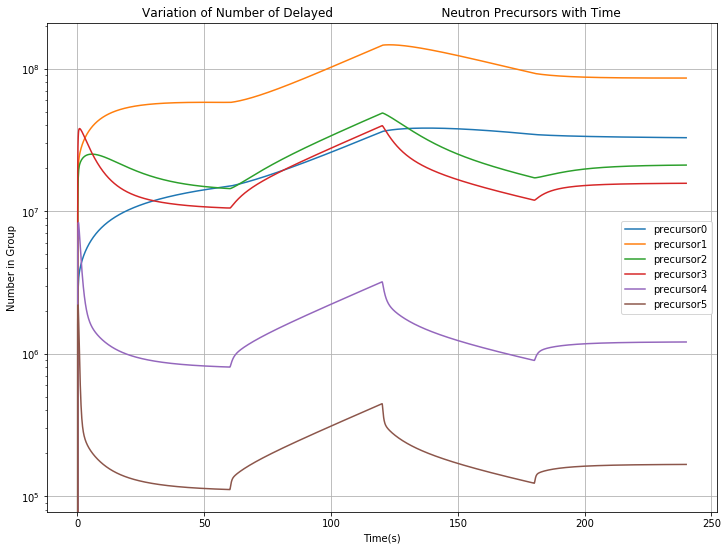

In [21]:
core1.plot_precursors()